In [1]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import os 
import math
import sys
from pathlib import Path
import seaborn as sns

# Add 'src' to the system path
sys.path.append(str(Path().resolve() / 'src'))
from src.data.process_data import *
from src.data.clean_data import *

In [2]:
# from clean data files, creates a dataframe with CMU + plots & TMDB movies 
df_combined = create_cmu_tmdb_dataset('data/processed/movies.csv','data/processed/plot_summaries.csv', 'data/processed/TMDB_clean.csv', 'inner')

In [3]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430511 entries, 0 to 746358
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   release_year          430511 non-null  int64 
 1   summary               364080 non-null  object
 2   release_date          430511 non-null  object
 3   budget                430511 non-null  int64 
 4   original_language     430511 non-null  object
 5   overview              364080 non-null  object
 6   genres                430511 non-null  object
 7   production_companies  430511 non-null  object
 8   production_countries  430511 non-null  object
 9   spoken_languages      430511 non-null  object
 10  keywords              430511 non-null  object
 11  title                 430508 non-null  object
 12  revenue               430511 non-null  int64 
 13  runtime               430511 non-null  int64 
 14  dvd_era               430511 non-null  object
dtypes: int64(4), object(11

In [4]:
df_combined.head()

,release_year,summary,release_date,budget,original_language,overview,genres,production_companies,production_countries,spoken_languages,keywords,title,revenue,runtime,dvd_era
0,1987,A series of murders of rich young women throug...,1987-06-19,0,en,"In a wealthy and isolated desert community, a ...","[Horror, Thriller]",[Mrs. White's Productions],[United Kingdom],[English],"[based on novel or book, gas station, psychopa...",White Of The EyeWhite of the Eye,0,221,pre
1,1983,"Eva, an upper class housewife, becomes frustra...",1983-05-11,0,de,"Eva, an upper-class housewife, frustratedly le...",[Drama],[Dieter Geissler Filmproduktion],[Germany],[German],"[jealousy, eroticism, gigolo, longing, dominat...",A Woman in FlamesA Woman in Flames,0,212,pre
2,2002,"Every hundred years, the evil Morgana returns...",2002-04-12,0,en,"Every hundred years, the evil sorceress Morgan...","[Adventure, Family, Fantasy]","[Peakviewing Productions, Peakviewing Transatl...",[United Kingdom],"[French, English]",[morgana],The Sorcerer's ApprenticeThe Sorcerer's Appren...,0,172,during
3,1997,"Adam, a San Francisco-based artist who works a...",1997-04-04,0,en,Best friends Adam and Kevin have a lot in comm...,"[Comedy, Romance]","[Bandeira Entertainment, Miramax]",[],[English],[],Little cityLittle City,0,183,pre
4,1989,{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,1989-10-05,9000000,en,Gritty adaption of William Shakespeare's play ...,"[War, Drama, History]","[BBC Film, Renaissance Films, Samuel Goldwyn C...",[United Kingdom],[English],"[france, kingdom, theater play, based on true ...",Henry VHenry V,20337800,274,pre


In [30]:
df_combined[(df_combined['budget'] > 0) & (df_combined['revenue'] > 0) & (df_combined['dvd_era'] == "pre")]

,release_year,summary,release_date,budget,original_language,overview,genres,production_companies,production_countries,spoken_languages,keywords,title,revenue,runtime,dvd_era
4,1989,{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,1989-10-05,9000000,en,Gritty adaption of William Shakespeare's play ...,"[War, Drama, History]","[BBC Film, Renaissance Films, Samuel Goldwyn C...",[United Kingdom],[English],"[france, kingdom, theater play, based on true ...",Henry VHenry V,20337800,274,pre
15,1980,The film is a collision of three separate stor...,1980-09-10,5000000,en,A Coca-Cola bottle dropped from an airplane ra...,"[Action, Comedy]","[CAT Films, Mimosa Films]","[South Africa, Botswana]","[Afrikaans, English, Tswana]","[airplane, africa, coca-cola, tribe, god, dese...",The Gods Must Be CrazyThe Gods Must Be Crazy,94331783,218,pre
16,1989,A Japanese businessman sees a woman being grop...,1989-02-03,5000000,en,A brutal Los Angeles police lieutenant is dete...,"[Action, Drama, Thriller]",[Golan-Globus Productions],[United States of America],[English],"[rape, eating non food]",Kinjite: Forbidden SubjectsKinjite: Forbidden ...,6833692,194,pre
35,1979,Arthur Kirkland is a hotheaded but idealistic...,1979-10-19,6000000,en,An ethical Baltimore defense lawyer disgusted ...,[Drama],[Columbia Pictures],[United States of America],"[Czech, English]","[lawyer, courtroom, extramarital affair, court...",...And Justice for All...And Justice for All,66600000,239,pre
40,1995,"Jimmy ""The Saint"" Tosnia is a dapper ex-gangs...",1995-12-01,8000000,en,Five different criminals face imminent death a...,"[Drama, Crime]",[Miramax],[United States of America],"[French, English]","[friendship, bounty hunter, hitman, parent chi...",Things to Do in Denver When You're DeadThings ...,1059443,231,pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19590,1997,After Ryan Weaver is arrested for a murder tha...,1997-01-09,55000000,en,"On a flight transporting dangerous convicts, m...","[Action, Thriller, Crime]","[Rysher Entertainment, Metro-Goldwyn-Mayer]",[United States of America],[English],"[airplane, stewardess, shootout, air marshal, ...",TurbulenceTurbulence,23004323,201,pre
19597,1996,"In June 1969, a family, including a five year-...",1996-05-10,92000000,en,An unprecedented series of violent tornadoes i...,"[Action, Adventure, Drama]","[Constant c Productions, Universal Pictures, A...",[United States of America],[English],"[husband wife relationship, climate, tornado, ...",TwisterTwister,988943048,226,pre
19606,1997,The film opens with Oscar Wilde's 1882 visit t...,1997-09-01,2158775,en,"The story of Oscar Wilde, genius, poet, playwr...","[Drama, History]","[Dove International, BBC, capitol internationa...","[Germany, Japan, United Kingdom]",[English],"[prison, coming out, london, england, wife, bi...",WildeWilde,12158775,236,pre
19607,1988,"Akeem Joffer , the prince and heir to the thro...",1988-06-29,30000000,en,An African prince decides it’s time for him to...,"[Comedy, Romance]","[Eddie Murphy Productions, Paramount]",[United States of America],[English],"[new york city, fast food restaurant, prince, ...",Coming to AmericaComing to America,577504602,234,pre


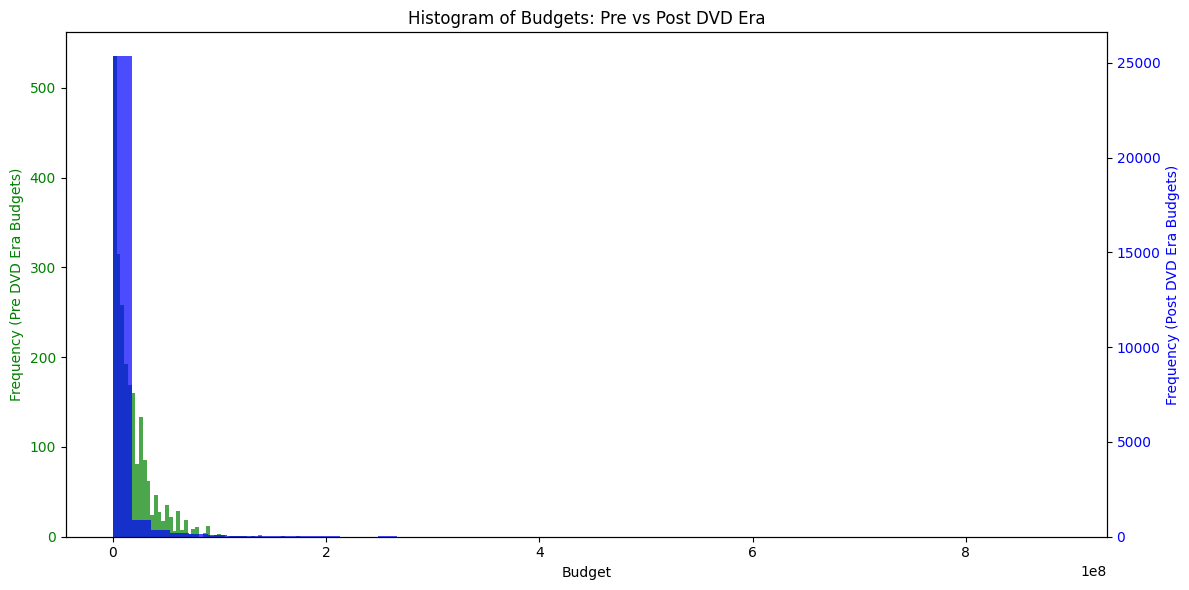

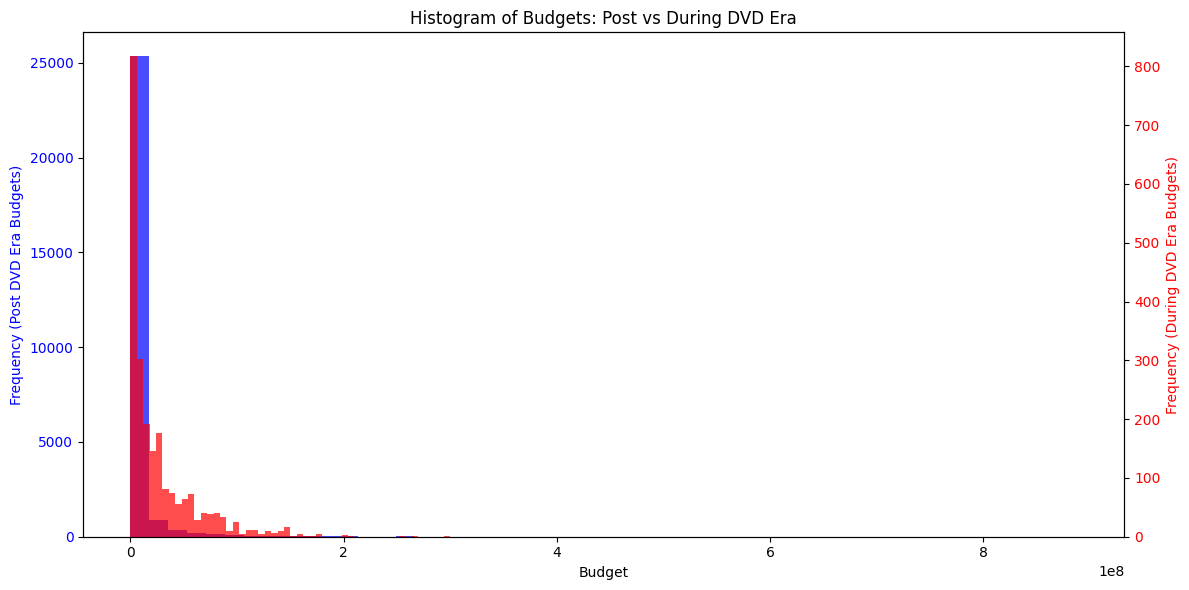

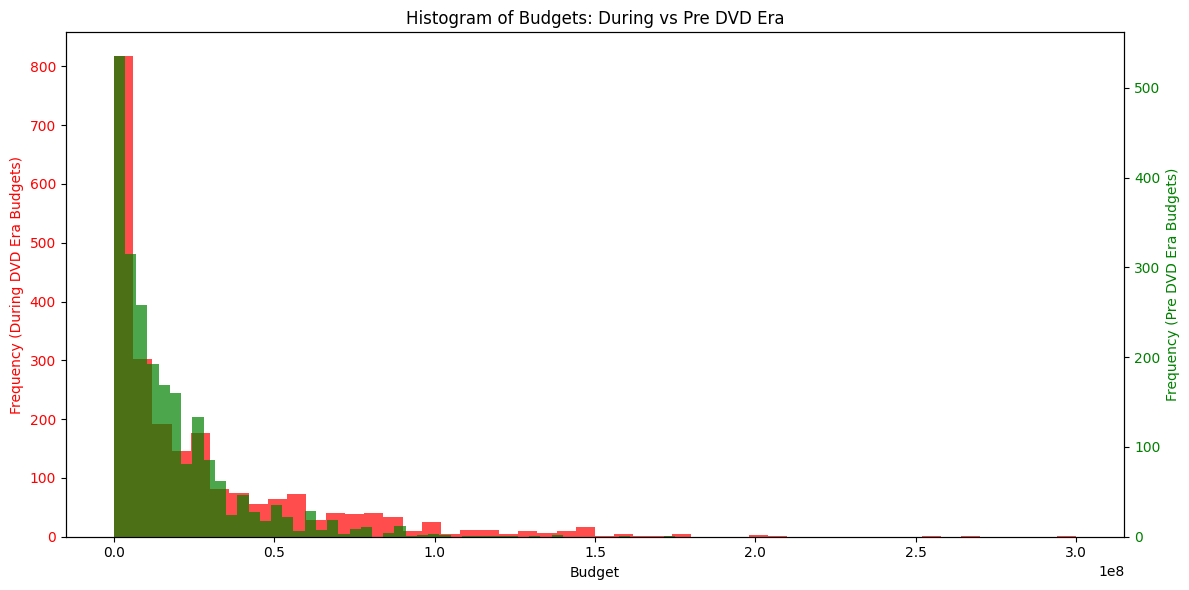

In [54]:
import numpy as np

df_filtered = df_combined[(df_combined['budget'] > 0)]

def plot_histogram(df, era1, era2, color1, color2, label1, label2, title):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot first era budgets
    ax1.hist(df[df['dvd_era'] == era1]['budget'], bins=50, color=color1, alpha=0.7, label=label1)
    ax1.set_xlabel('Budget')
    ax1.set_ylabel(f'Frequency ({label1})', color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)

    # Create a second y-axis for second era budgets
    ax2 = ax1.twinx()
    ax2.hist(df[df['dvd_era'] == era2]['budget'], bins=50, color=color2, alpha=0.7, label=label2)
    ax2.set_ylabel(f'Frequency ({label2})', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)

    plt.title(title)
    fig.tight_layout()
    plt.show()

# Plot histograms
plot_histogram(df_filtered, "pre", "post", 'green', 'blue', 'Pre DVD Era Budgets', 'Post DVD Era Budgets', 'Histogram of Budgets: Pre vs Post DVD Era')
plot_histogram(df_filtered, "post", "during", 'blue', 'red', 'Post DVD Era Budgets', 'During DVD Era Budgets', 'Histogram of Budgets: Post vs During DVD Era')
plot_histogram(df_filtered, "during", "pre", 'red', 'green', 'During DVD Era Budgets', 'Pre DVD Era Budgets', 'Histogram of Budgets: During vs Pre DVD Era')


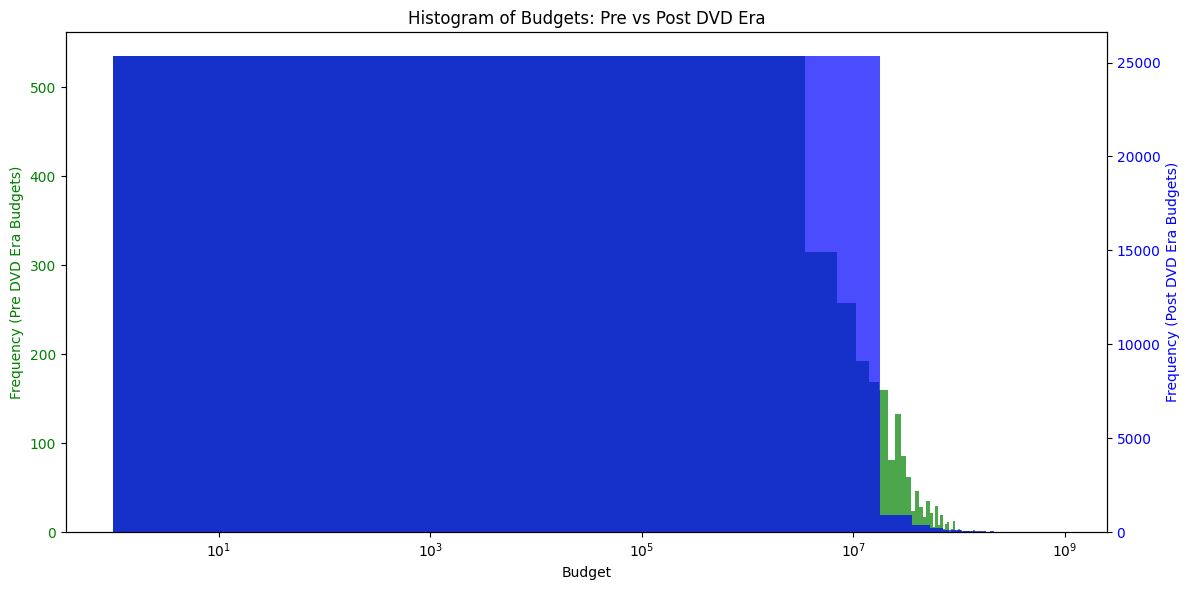

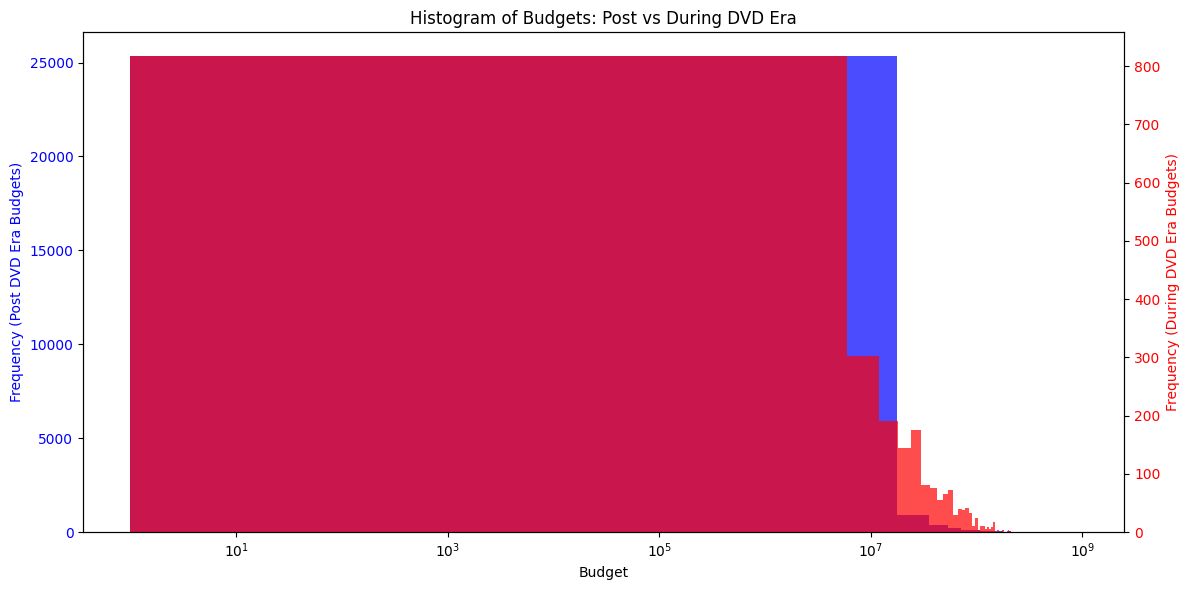

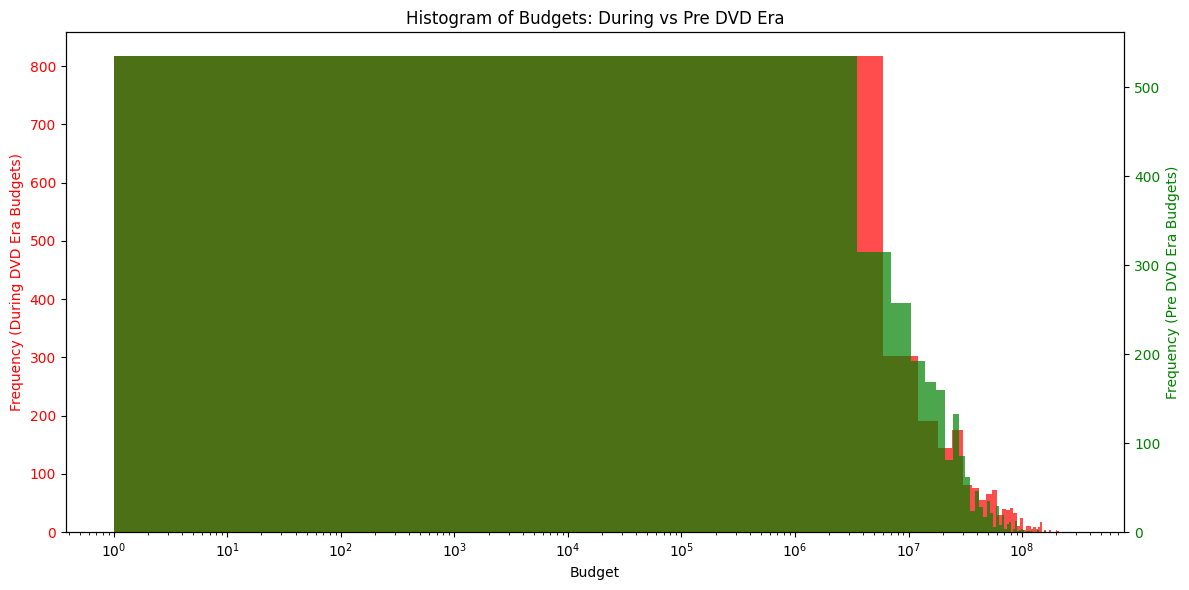

In [55]:
import numpy as np

df_filtered = df_combined[(df_combined['budget'] > 0)]

def plot_histogram(df, era1, era2, color1, color2, label1, label2, title):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot first era budgets
    ax1.hist(df[df['dvd_era'] == era1]['budget'], bins=50, color=color1, alpha=0.7, label=label1)
    ax1.set_xlabel('Budget')
    ax1.set_ylabel(f'Frequency ({label1})', color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.set_xscale('log')

    # Create a second y-axis for second era budgets
    ax2 = ax1.twinx()
    ax2.hist(df[df['dvd_era'] == era2]['budget'], bins=50, color=color2, alpha=0.7, label=label2)
    ax2.set_ylabel(f'Frequency ({label2})', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.set_xscale('log')

    plt.title(title)
    fig.tight_layout()
    plt.show()

# Plot histograms
plot_histogram(df_filtered, "pre", "post", 'green', 'blue', 'Pre DVD Era Budgets', 'Post DVD Era Budgets', 'Histogram of Budgets: Pre vs Post DVD Era')
plot_histogram(df_filtered, "post", "during", 'blue', 'red', 'Post DVD Era Budgets', 'During DVD Era Budgets', 'Histogram of Budgets: Post vs During DVD Era')
plot_histogram(df_filtered, "during", "pre", 'red', 'green', 'During DVD Era Budgets', 'Pre DVD Era Budgets', 'Histogram of Budgets: During vs Pre DVD Era')


C:\Users\nicol\AppData\Local\Temp\ipykernel_7732\3043217746.py:1: FutureWarning: The provided callable <function mean at 0x000002133A7BAF70> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  budget_stats = df_filtered.groupby('release_year')['budget'].agg([np.mean, np.median])
C:\Users\nicol\AppData\Local\Temp\ipykernel_7732\3043217746.py:1: FutureWarning: The provided callable <function median at 0x000002133A8F3430> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  budget_stats = df_filtered.groupby('release_year')['budget'].agg([np.mean, np.median])
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. C

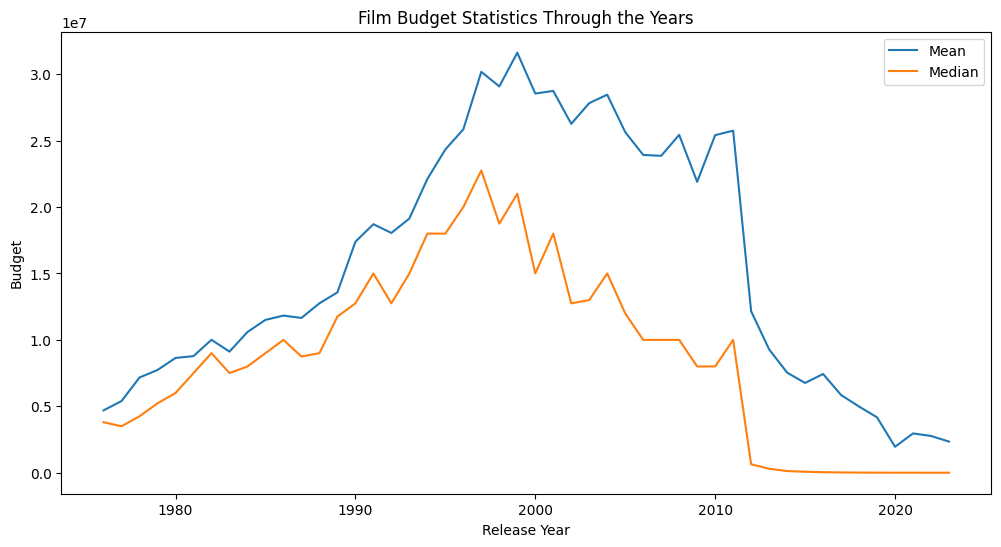

In [43]:
budget_stats = df_filtered.groupby('release_year')['budget'].agg([np.mean, np.median])

# Plot the statistics
plt.figure(figsize=(12, 6))
sns.lineplot(data=budget_stats, x=budget_stats.index, y='mean', label='Mean')
sns.lineplot(data=budget_stats, x=budget_stats.index, y='median', label='Median')
plt.title('Film Budget Statistics Through the Years')
plt.xlabel('Release Year')
plt.ylabel('Budget')
plt.legend()
plt.show()

c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


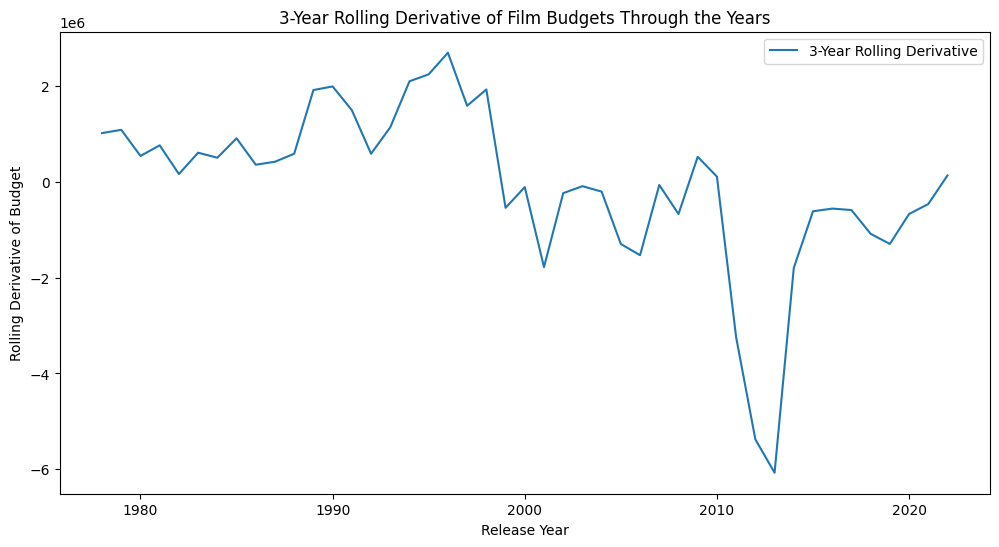

In [52]:
# Calculate the rolling derivative with a window of 3 years
budget_stats['rolling_derivative'] = budget_stats['mean'].diff().rolling(window=3, center=True).mean()

# Plot the rolling derivative
plt.figure(figsize=(12, 6))
sns.lineplot(data=budget_stats, x=budget_stats.index, y='rolling_derivative', label='3-Year Rolling Derivative')
plt.title('3-Year Rolling Derivative of Film Budgets Through the Years')
plt.xlabel('Release Year')
plt.ylabel('Rolling Derivative of Budget')
plt.legend()
plt.show()